In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 분석목적:고객 데이터를 기반으로 세그먼트를 정의하여 CRM 마케팅 전략 기획
#### 독립변수:RFM
#### 측정인원:1468명
#### 분석방법:RFM 점수를 산출하여 4그룹으로 고객 분류

### (1) 전처리 by SQL

In [2]:
merged_data = pd.read_csv("eccomerceData.csv")
merged_data

#가공변수
#Transaction_Date:date형변환 -> %Y-%m-%d
#Transaction_Month:'월'만 추출
#Coupon_Applied
#invoice = quantity*avg_price*(1-discount_pct/100)*(1+gst/100)+delivery_charges

,CustomerID,Transaction_ID,Transaction_Date,Transaction_Month,Product_SKU,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Discount_pct,Coupon_Applied,invoice,Gender,Location,Tenure_Months,Offline_Spend,Online_Spend
0,17850,16679,2019-01-01,1,GGOENEBJ079499,Nest-USA,1,153.71,6.50,Used,10,10.0,1,158.67290,M,Chicago,12,4500,2424.50
1,17850,16680,2019-01-01,1,GGOENEBJ079499,Nest-USA,1,153.71,6.50,Used,10,10.0,1,158.67290,M,Chicago,12,4500,2424.50
2,17850,16681,2019-01-01,1,GGOEGFKQ020399,Office,1,2.05,6.50,Used,10,10.0,1,8.52950,M,Chicago,12,4500,2424.50
3,17850,16682,2019-01-01,1,GGOEGAAB010516,Apparel,5,17.53,6.50,Not Used,18,10.0,0,109.92700,M,Chicago,12,4500,2424.50
4,17850,16682,2019-01-01,1,GGOEGBJL013999,Bags,1,16.50,6.50,Used,18,10.0,1,24.02300,M,Chicago,12,4500,2424.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,2019-12-31,12,GGOENEBB078899,Nest-USA,1,121.30,6.50,Clicked,10,30.0,0,139.93000,F,New York,45,4000,2058.75
52920,14410,48494,2019-12-31,12,GGOEGAEB091117,Apparel,1,48.92,6.50,Used,18,30.0,1,46.90792,F,New York,45,4000,2058.75
52921,14410,48495,2019-12-31,12,GGOENEBQ084699,Nest-USA,1,151.88,6.50,Used,10,30.0,1,123.44760,F,New York,45,4000,2058.75
52922,14600,48496,2019-12-31,12,GGOENEBQ079199,Nest-USA,5,80.52,6.50,Clicked,10,30.0,0,449.36000,F,California,7,4000,2058.75


In [4]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         52924 non-null  int64  
 1   Transaction_ID     52924 non-null  int64  
 2   Transaction_Date   52924 non-null  object 
 3   Transaction_Month  52924 non-null  int64  
 4   Product_SKU        52924 non-null  object 
 5   Product_Category   52924 non-null  object 
 6   Quantity           52924 non-null  int64  
 7   Avg_Price          52924 non-null  float64
 8   Delivery_Charges   52924 non-null  float64
 9   Coupon_Status      52924 non-null  object 
 10  GST                52924 non-null  int64  
 11  Discount_pct       52524 non-null  float64
 12  Coupon_Applied     52924 non-null  int64  
 13  invoice            52924 non-null  float64
 14  Gender             52924 non-null  object 
 15  Location           52924 non-null  object 
 16  Tenure_Months      529

### (2)-1 월별 고객수 시각화

In [3]:
merged_data['Transaction_Date'] = pd.to_datetime(merged_data['Transaction_Date']) #'일' 차이를 구하기 위해서 datetime형변환
merged_data['Transaction_Date']

0       2019-01-01
1       2019-01-01
2       2019-01-01
3       2019-01-01
4       2019-01-01
           ...    
52919   2019-12-31
52920   2019-12-31
52921   2019-12-31
52922   2019-12-31
52923   2019-12-31
Name: Transaction_Date, Length: 52924, dtype: datetime64[ns]

In [7]:
customer_cnt_by_month = merged_data.groupby('Transaction_Month')['CustomerID'].nunique()
customer_cnt_by_month

Transaction_Month
1     215
2     109
3     208
4     224
5     200
6     259
7     236
8     300
9     193
10    210
11    188
12    236
Name: CustomerID, dtype: int64

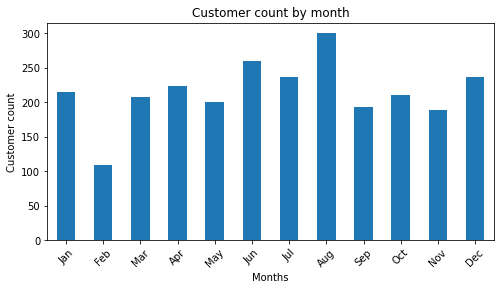

In [8]:
plt.figure(figsize=(8,4))
customer_cnt_by_month.plot(kind='bar')
plt.xlabel('Months')
plt.ylabel('Customer count')
plt.title('Customer count by month')
plt.xticks(ticks=range(0,12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

### (2)-2 유지율(리텐션) - 좀 더 고민 필요

### (2)-3 매출 상위 10개 상품 시각화

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'GGOEGGOA017399'),
  Text(1, 0, 'GGOEGDHC018299'),
  Text(2, 0, 'GGOEGBMJ013399'),
  Text(3, 0, 'GGOEGOLC014299'),
  Text(4, 0, 'GGOEGFKQ020399'),
  Text(5, 0, 'GGOEGFSR022099'),
  Text(6, 0, 'GGOENEBQ078999'),
  Text(7, 0, 'GGOEGFYQ016599'),
  Text(8, 0, 'GGOEGOAQ012899'),
  Text(9, 0, 'GGOENEBJ079499')])

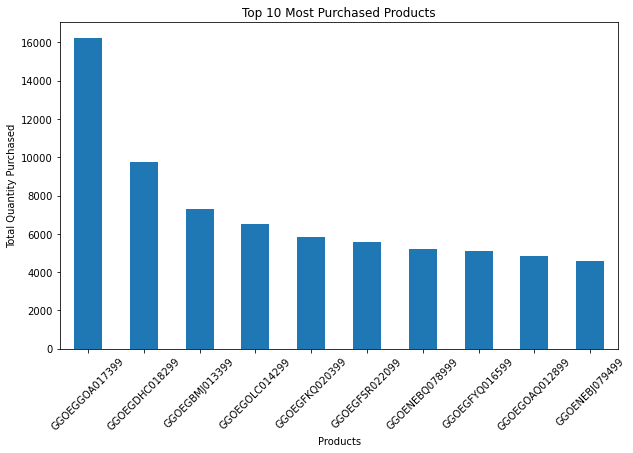

In [9]:
quantity_categories = merged_data.groupby('Product_SKU')['Quantity'].sum()

top10_categories = quantity_categories.sort_values(ascending = False).head(10)

plt.figure(figsize=(10, 6))
top10_categories.plot(kind='bar')
plt.xlabel('Products')
plt.ylabel('Total Quantity Purchased')
plt.title('Top 10 Most Purchased Products')
plt.xticks(rotation=45)

### (2)-4 판매 매출액, 판매 수량별 상위 5개 

In [10]:
merged_data.groupby('Product_Category').agg({'invoice':'sum'
                                            ,'Quantity':'sum'}).nlargest(5,'invoice')

,invoice,Quantity
Product_Category,,
Nest-USA,2.721646e+06,21430
Apparel,8.278292e+05,32438
Nest,5.206537e+05,2837
Office,3.819453e+05,88383
Drinkware,2.726220e+05,30501


In [11]:
merged_data.groupby('Product_Category').agg({'invoice':'sum'
                                            ,'Quantity':'sum'}).nlargest(5,'Quantity')

,invoice,Quantity
Product_Category,,
Office,3.819453e+05,88383
Apparel,8.278292e+05,32438
Drinkware,2.726220e+05,30501
Lifestyle,1.252760e+05,24881
Nest-USA,2.721646e+06,21430


### (3) 고객 세그먼트 정의

In [12]:
# Calculate Recency, Frequency, and Monetary values
current_date = pd.to_datetime('2020-01-01')

# Transaction_Date = (current_date-merged_data.groupby('CustomerID')['Transaction_Date'].max()).dt.days #'day'계산 -> .dt.days
# Frequency = merged_data.groupby('CustomerID').size()
# Monetary = merged_data.groupby('CustomerID')['invoice'].sum()
# Transaction_Date

segment = merged_data.groupby('CustomerID').agg({'Transaction_Date':lambda x:(current_date-x.max()).days #Recency
                                                ,'Transaction_ID':'count' #Frequency
                                                ,'invoice':'sum' #Monetary
                                                })

#r_thresholds = [0, 100, 200, 300, float('inf')]
f_thresholds = [0, 40, 70, 100, float('inf')]
m_thresholds = [0, 4000, 7000, 10000, float('inf')]

def r_score(x): #값이 작을수록 "최근에 주문했다는 증거" 이므로 높은 점수 반영
    if x <= 100:
        return 4
    elif x <= 200:
        return 3
    elif x <= 300:
        return 2
    else :
        return 1
    
segment['R_Segment'] = segment['Transaction_Date'].apply(r_score)

#segment['R_Segment'] = pd.cut(segment['Transaction_Date'], bins=r_thresholds, labels=False) + 1

segment['F_Segment'] = pd.cut(segment['Transaction_ID'], bins=f_thresholds, labels=False) + 1

segment['M_Segment'] = pd.cut(segment['invoice'], bins=m_thresholds, labels=False) + 1

segment['RFM'] = (segment['R_Segment']+segment['F_Segment']+segment['M_Segment'])*10

def level(x):
    if x<=40:
        return 'Standard'
    elif x<=70:
        return 'Silver'
    elif x<=90:
        return 'Gold'
    else :
        return 'Platinum'

segment['level'] = segment['RFM'].apply(level)
segment

,Transaction_Date,Transaction_ID,invoice,R_Segment,F_Segment,M_Segment,RFM,level
CustomerID,,,,,,,,
12346,108,2,174.98174,3,1,1,50,Silver
12347,60,60,15686.84396,4,2,4,100,Platinum
12348,74,23,1689.55594,4,1,1,60,Silver
12350,18,17,1467.43528,4,1,1,60,Silver
12356,108,36,2007.42900,3,1,1,50,Silver
...,...,...,...,...,...,...,...,...
18259,271,7,860.68600,2,1,1,40,Standard
18260,88,40,3016.54372,4,1,1,60,Silver
18269,195,8,166.90750,3,1,1,50,Silver


In [9]:
segment['F_Segment'].value_counts()

1    1045
2     238
3      93
4      92
Name: F_Segment, dtype: int64

In [6]:
segment['M_Segment'].value_counts()

1    1046
2     214
4     105
3     103
Name: M_Segment, dtype: int64

In [13]:
segment['R_Segment'].value_counts()

4    588
3    435
2    303
1    142
Name: R_Segment, dtype: int64

C:\Users\SF314-59\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RFM', ylabel='Density'>

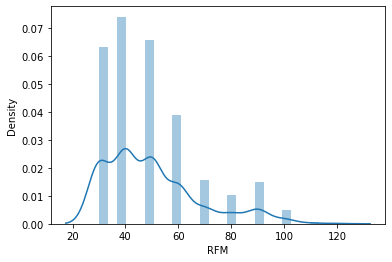

In [24]:
sns.distplot(segment['RFM'])

C:\Users\SF314-59\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Transaction_Date', ylabel='Density'>

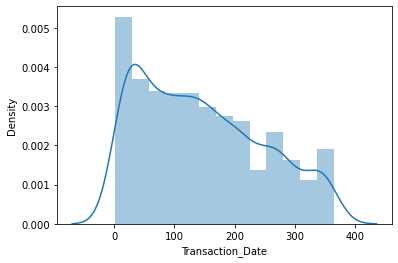

In [25]:
sns.distplot(segment['Transaction_Date'])

C:\Users\SF314-59\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Transaction_ID', ylabel='Density'>

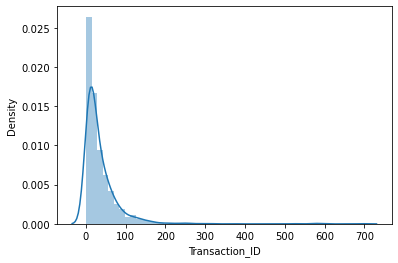

In [26]:
sns.distplot(segment['Transaction_ID'])

C:\Users\SF314-59\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='invoice', ylabel='Density'>

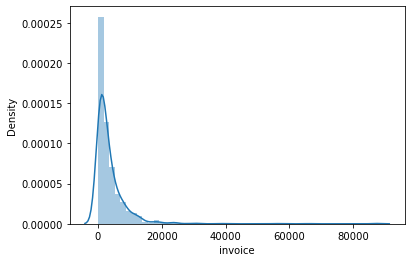

In [27]:
sns.distplot(segment['invoice'])

In [14]:
merged_data = merged_data.merge(segment[['level']], on='CustomerID', how='left')
merged_data.head()

,CustomerID,Transaction_ID,Transaction_Date,Transaction_Month,Product_SKU,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Discount_pct,Coupon_Applied,invoice,Gender,Location,Tenure_Months,Offline_Spend,Online_Spend,level
0,17850,16679,2019-01-01,1,GGOENEBJ079499,Nest-USA,1,153.71,6.5,Used,10,10.0,1,158.6729,M,Chicago,12,4500,2424.5,Gold
1,17850,16680,2019-01-01,1,GGOENEBJ079499,Nest-USA,1,153.71,6.5,Used,10,10.0,1,158.6729,M,Chicago,12,4500,2424.5,Gold
2,17850,16681,2019-01-01,1,GGOEGFKQ020399,Office,1,2.05,6.5,Used,10,10.0,1,8.5295,M,Chicago,12,4500,2424.5,Gold
3,17850,16682,2019-01-01,1,GGOEGAAB010516,Apparel,5,17.53,6.5,Not Used,18,10.0,0,109.9270,M,Chicago,12,4500,2424.5,Gold
4,17850,16682,2019-01-01,1,GGOEGBJL013999,Bags,1,16.50,6.5,Used,18,10.0,1,24.0230,M,Chicago,12,4500,2424.5,Gold


### (3)-1 Kmeans활용하여 고객 세그먼트별 특성 이해

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [26]:
features = segment[['Transaction_Date','Transaction_ID','invoice']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

k=4

kmeans = KMeans(n_clusters=k, random_state=0)
segment['Cluster'] = kmeans.fit_predict(scaled_features)
segment.head()

,Transaction_Date,Transaction_ID,invoice,R_Segment,F_Segment,M_Segment,RFM,level,Cluster_labels,Cluster
CustomerID,,,,,,,,,,
12346,108,2,174.98174,3,1,1,50,Silver,Standard,0
12347,60,60,15686.84396,4,2,4,100,Platinum,Gold,3
12348,74,23,1689.55594,4,1,1,60,Silver,Standard,0
12350,18,17,1467.43528,4,1,1,60,Silver,Standard,0
12356,108,36,2007.42900,3,1,1,50,Silver,Standard,0


In [27]:
segment.groupby('Cluster')[['Transaction_Date', 'Transaction_ID', 'invoice']].mean()

,Transaction_Date,Transaction_ID,invoice
Cluster,,,
0,78.212121,26.349144,2593.963364
1,255.359347,20.695100,1993.572948
2,30.200000,590.400000,70779.311820
3,85.437908,121.372549,12916.243788


In [28]:
def label_cluster(x):
    if x == 2 :
        return 'Platinum'
    elif x == 3 :
        return 'Gold'
    elif x == 0 :
        return 'Silver'
    else :
        return 'Standard'

segment['Cluster_labels'] = segment['Cluster'].apply(label_cluster)
segment.drop(columns='Cluster', inplace=True)

In [29]:
segment.head()

,Transaction_Date,Transaction_ID,invoice,R_Segment,F_Segment,M_Segment,RFM,level,Cluster_labels
CustomerID,,,,,,,,,
12346,108,2,174.98174,3,1,1,50,Silver,Silver
12347,60,60,15686.84396,4,2,4,100,Platinum,Gold
12348,74,23,1689.55594,4,1,1,60,Silver,Silver
12350,18,17,1467.43528,4,1,1,60,Silver,Silver
12356,108,36,2007.42900,3,1,1,50,Silver,Silver


In [30]:
print(segment['level'].value_counts())
print(segment['Cluster_labels'].value_counts())

Silver      834
Standard    351
Gold        153
Platinum    130
Name: level, dtype: int64
Silver      759
Standard    551
Gold        153
Platinum      5
Name: Cluster_labels, dtype: int64


C:\Users\SF314-59\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='level', ylabel='count'>

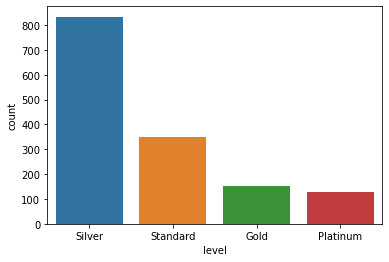

In [31]:
sns.countplot(segment['level'], order = segment['level'].value_counts().index)

### (4) LTV - 고객생애가치로 유저가 서비스를 사용하는 기간동안 창출하는 매출 by SQL

In [40]:
ltv = pd.read_csv("LTV.csv")
ltv

,Month,LTV
0,1,15421.0189
1,2,12164.8819
2,3,8589.6994
3,4,5723.2545
4,5,6112.0067
5,6,4055.8051
6,7,6067.3641
7,8,3825.9295
8,9,3026.2977
9,10,4926.8454


In [4]:
re = pd.read_csv("리텐션2.csv")
df = re.pivot(index='month_range',columns='month_nm', values='Retention')
df

month_nm,M-0,M-1,M-2,M-3,M-4,M-5,over_5M
month_range,,,,,,,
1,1.0,0.1907,0.0930,0.1442,0.1395,0.1581,0.4279
2,1.0,0.2917,0.1042,0.1563,0.1250,0.1667,0.5729
3,1.0,0.2260,0.1130,0.1864,0.1864,0.1638,0.3616
4,1.0,0.2086,0.1104,0.1595,0.1411,0.0982,0.2393
5,1.0,0.2589,0.0804,0.1071,0.0893,0.1161,0.2321
6,1.0,0.1898,0.1095,0.1241,0.0949,0.0876,0.1314
7,1.0,0.2447,0.0851,0.0532,0.0745,0.1277,0.0319
8,1.0,0.2222,0.1037,0.0519,0.0889,0.0148,NaN
9,1.0,0.1923,0.0385,0.0256,0.0128,NaN,NaN


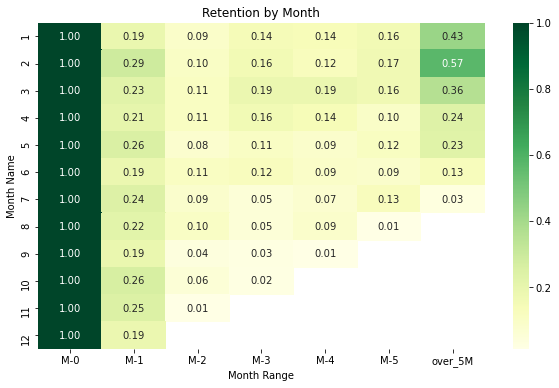

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, fmt=".2f", cmap="YlGn")
plt.title('Retention by Month')
plt.xlabel('Month Range')
plt.ylabel('Month Name')
plt.show()

### 분석결과
#### 1. 고객데이터를 기반 RFM 산출하여 세그먼트 정의
#### 2. KMeans를 활용하여 세그먼트별 특성 이해 및 맞춤 전략 수립
#### 3. 고객을 코호트로 쪼개어서 LTV 비교 분석

### 포트폴리오
#### 1.데이터 전처리 진행에 대한 충분한 논리와 근거를 제시
#### 2.4/20 기준 4페이지 진행 중인데 LTV 산출 과정에서 SQL 로직을 추가하면 좋을것같음 아무래도 .. 그냥 너무 바로 결과값만 띡 있는 느낌 

## 추가 분석 ?
### 월별 매출 순수익 = (총매출-마케팅 비용) 비교 (?) 
### 3개월 말고 6개월로 리텐션 분석해보기